This Colab notebook for homework 3 is mostly the same as homework 2. Again, see the colab notebook for homework 1 for how to setup and upload your code/data.

In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir log

In [0]:
import homework
import homework.train_cnn
import homework.train_fcn

In [0]:
from collections import namedtuple
args = namedtuple('args', 'log_dir other_args')
args.log_dir = 'log'
args.other_args = 'something'

In [ ]:
homework.train_cnn.train(args)

Download your saved model with:

In [0]:
from google.colab import files
files.download('homework/cnn.th')

Do the same for your FCN model.

---

In [52]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms

In [26]:
datadir = 'C:\\Users\\Owner\\Documents\\dl_data\\data\\train\\'
filenames = os.listdir(datadir)
filenames = np.array(filenames)
filenames = filenames[np.random.randint(0, len(filenames), 500)]

In [155]:
rand = np.random.randint(0, len(filenames))
images = []
for fn in filenames:
    image = Image.open(datadir + str(fn))
    images.append(image)

In [148]:
images = np.array(images)

In [152]:
images.mean()

82.56293766276042

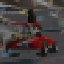

In [309]:
t = transforms.Compose([
            transforms.ColorJitter(brightness=0.9),
            transforms.RandomHorizontalFlip(p=0.5)
        ])


t(images[10])


In [519]:
arrays = [np.array(i) for i in images[:4]]
i = torch.FloatTensor(arrays)
i = i.reshape(1,3,64*2,64*2)
i.shape

torch.Size([1, 3, 128, 128])

In [520]:
from homework import models
import torch
import importlib
importlib.reload(models)

f = models.FCN()

In [521]:
f.forward(i).shape

torch.Size([1, 5, 128, 128])

In [405]:
from homework import train_fcn
importlib.reload(train_fcn)

from collections import namedtuple
args = namedtuple('args', 'log_dir other_args')
args.log_dir = 'log'
args.learning_rate = 0.002
args.num_epoch = 20
args.continue_training = False
args.dropout_p = .25
args.num_augment = 15
args.data_limit=99999999

train_fcn.train(args)

ValueError: num_samples should be a positive integer value, but got num_samples=0